## LIBRARIES IMPORT

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle #saving the model
from warnings import simplefilter
import warnings
warnings.filterwarnings('ignore')

## DATA IMPORT

In [5]:
df = pd.read_csv("PC-SM.csv")

## EXPLORATORY DATA ANALYSIS 

In [8]:
df.shape

(472, 55)

In [10]:
df.columns

Index(['ID', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'PS7', 'PS8', 'PS9',
       'SMUT1', 'SMUT2', 'SMUT3', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT7', 'SMUT8',
       'SMUT9', 'OSC1', 'OSC2', 'OSC3', 'OSC4', 'OSC5', 'OSC6', 'VONP 1',
       'VONP2', 'VONP3', 'VONP4', 'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1',
       'VOFP2', 'VOFP3', 'VOFP4', 'VOFP5', 'VOFP6', 'VOFP7', 'PLT1', 'PLT2',
       'PLT3', 'PLT4', 'PLT5', 'PLT6', 'PLT7', 'Gender', 'Age', 'MS', 'RL',
       'PI', 'Education Level', 'ED', 'COO'],
      dtype='object')

In [12]:
df.head()

,ID,PS1,PS2,PS3,PS4,PS5,PS6,PS7,PS8,PS9,...,PLT6,PLT7,Gender,Age,MS,RL,PI,Education Level,ED,COO
0,1,4,2,4,4,4,4,4,4,2,...,4,4,2,1,3,1,1,5,5,3
1,2,4,3,3,3,3,3,4,3,2,...,4,4,2,1,1,1,1,5,2,3
2,3,5,4,4,4,3,4,5,3,3,...,4,5,1,2,3,1,6,5,1,3
3,4,5,2,3,3,3,3,4,3,1,...,4,4,1,1,1,1,2,4,5,3
4,5,4,4,4,4,3,3,3,3,3,...,2,2,1,1,1,1,2,5,5,3


In [14]:
df.isnull().sum()

ID                 0
PS1                0
PS2                0
PS3                0
PS4                0
PS5                0
PS6                0
PS7                0
PS8                0
PS9                0
SMUT1              0
SMUT2              0
SMUT3              0
SMUT4              0
SMUT5              0
SMUT6              0
SMUT7              0
SMUT8              0
SMUT9              0
OSC1               0
OSC2               0
OSC3               0
OSC4               0
OSC5               0
OSC6               0
VONP 1             0
VONP2              0
VONP3              0
VONP4              0
VONP5              0
VONP6              0
VONP7              0
VONP8              0
VOFP1              0
VOFP2              0
VOFP3              0
VOFP4              0
VOFP5              0
VOFP6              0
VOFP7              0
PLT1               0
PLT2               0
PLT3               0
PLT4               0
PLT5               0
PLT6               0
PLT7               0
Gender       

In [16]:
df.describe()

,ID,PS1,PS2,PS3,PS4,PS5,PS6,PS7,PS8,PS9,...,PLT6,PLT7,Gender,Age,MS,RL,PI,Education Level,ED,COO
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,...,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,236.500000,3.682203,2.872881,2.985169,3.273305,3.086864,3.097458,3.283898,2.838983,2.747881,...,3.167373,2.847458,1.381356,2.241525,2.150424,2.497881,4.758475,4.483051,2.942797,1.985169
std,136.398925,1.277214,1.394844,1.390670,1.246433,1.350818,1.364952,1.436525,1.375987,1.384627,...,1.062563,1.101068,0.486235,1.248750,1.342052,2.199207,2.455751,1.019829,2.428360,0.815060
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,118.750000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,1.000000,1.000000
50%,236.500000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.500000,...,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,6.500000,4.000000,1.000000,2.000000
75%,354.250000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,7.000000,5.000000,5.000000,3.000000
max,472.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,2.000000,6.000000,7.000000,8.000000,7.000000,8.000000,10.000000,3.000000


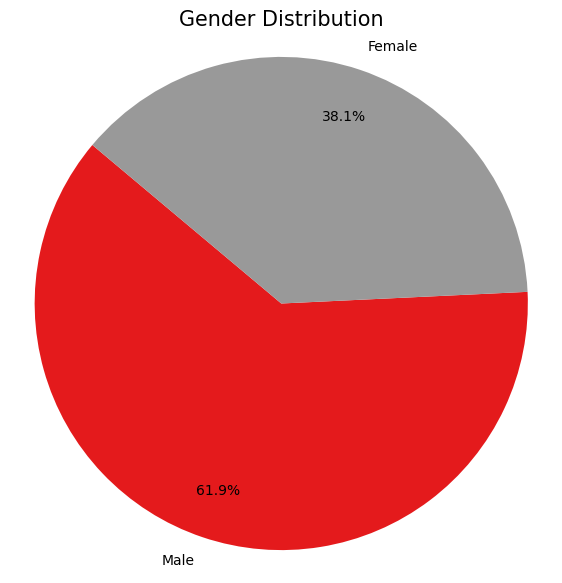

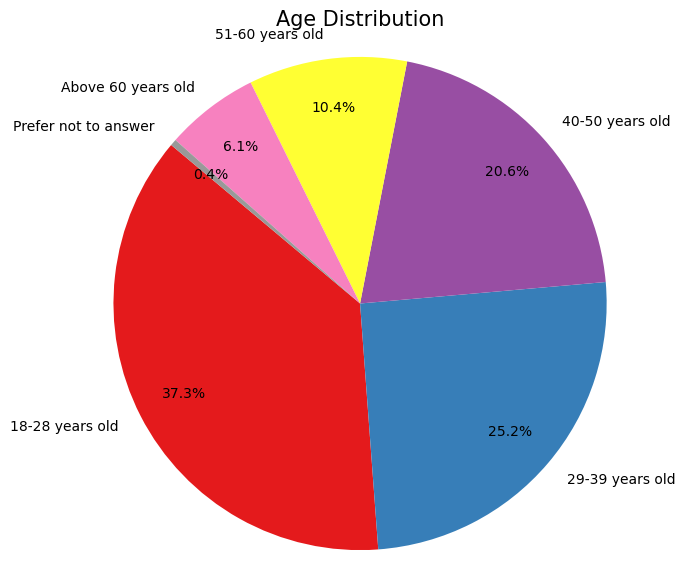

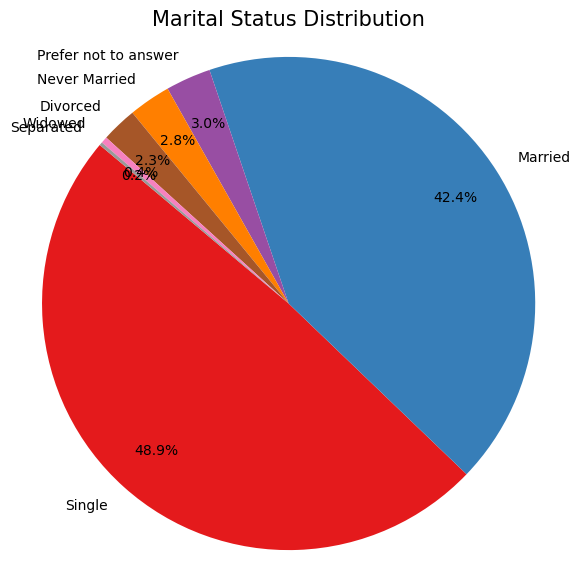

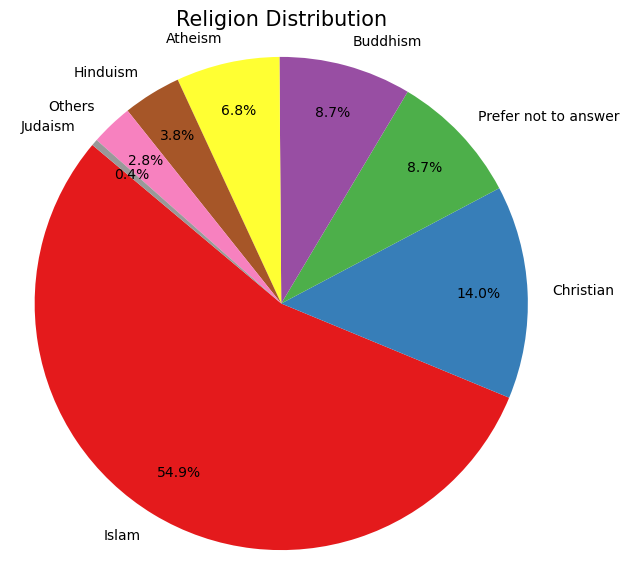

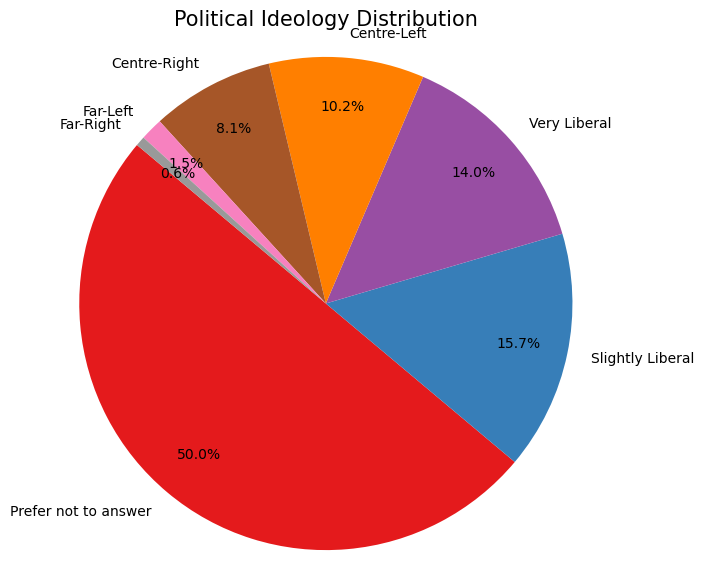

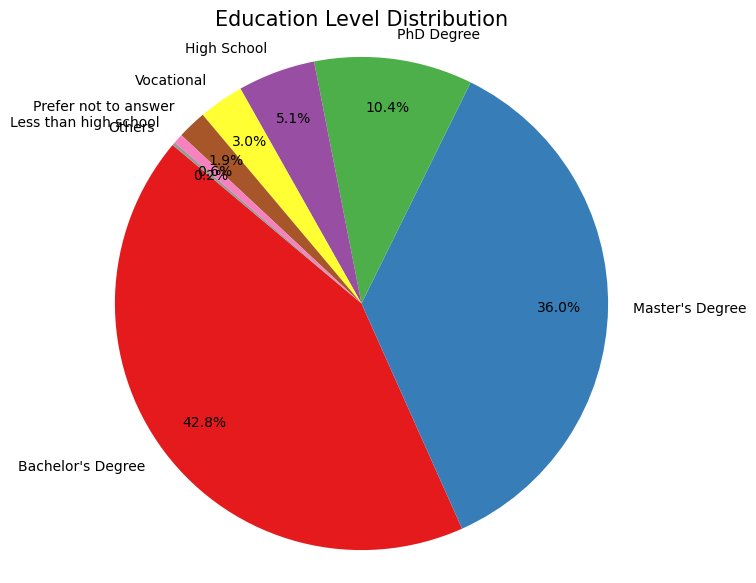

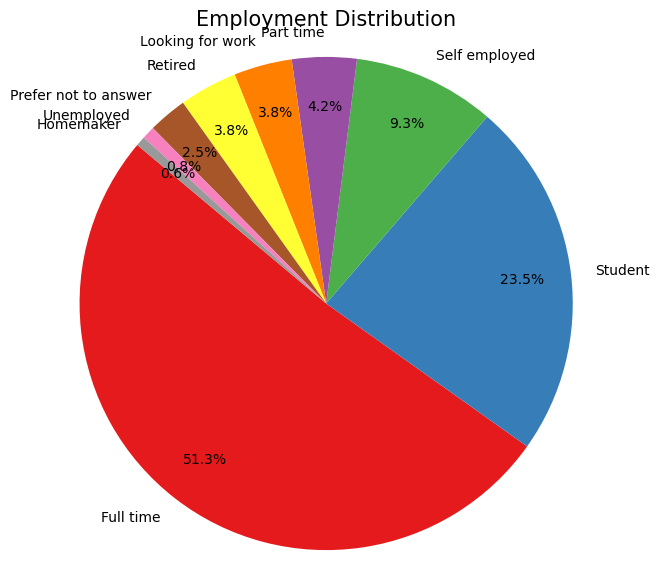

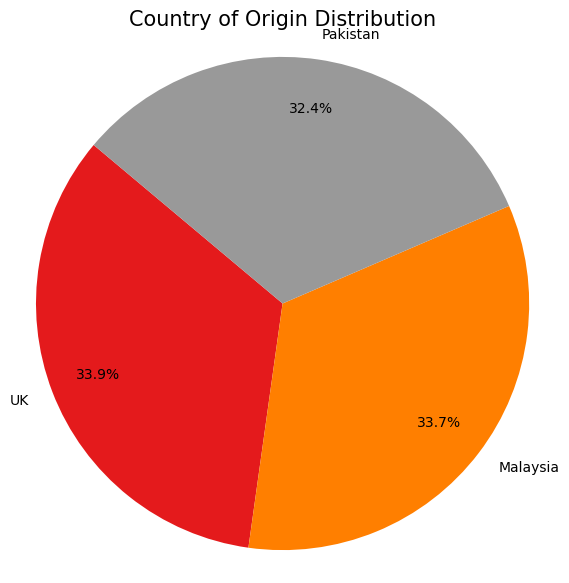

In [18]:
title_map = {
    'Gender': 'Gender Distribution',
    'Age': 'Age Distribution',
    'MS': 'Marital Status Distribution',
    'RL': 'Religion Distribution',
    'PI': 'Political Ideology Distribution',
    'Education Level': 'Education Level Distribution',
    'ED': 'Employment Distribution',
    'COO': 'Country of Origin Distribution'
}

value_mappings = {
    'Gender': {
        1: 'Male',
        2: 'Female'
    },
    'Age': {
        1: '18-28 years old',
        2: '29-39 years old',
        3: '40-50 years old',
        4: '51-60 years old',
        5: 'Above 60 years old',
        6: 'Prefer not to answer'
    },
    'MS': {
        1: 'Single',
        2: 'Never Married',
        3: 'Married',
        4: 'Divorced',
        5: 'Widowed',
        6: 'Separated',
        7: 'Prefer not to answer'},
    'RL': {
        1: 'Islam',
        2: 'Christian',
        3: 'Buddhism',
        4: 'Hinduism',
        5: 'Judaism',
        6: 'Atheism',
        7: 'Prefer not to answer',
        8: 'Others'},
    'PI': {
        1: 'Very Liberal',
        2: 'Slightly Liberal',
        3: 'Centre-Left',
        4: 'Far-Left',
        5: 'Centre-Right',
        6: 'Far-Right',
        7: 'Prefer not to answer'},
    'Education Level': {
        1: 'Less than high school',
        2: 'High School',
        3: 'Vocational',
        4: 'Bachelor\'s Degree',
        5: 'Master\'s Degree',
        6: 'PhD Degree',
        7: 'Prefer not to answer',
        8: 'Others'},

    'ED' : {
        1: 'Full time',
        2: 'Part time',
        3: 'Self employed',
        4: 'Homemaker',
        5: 'Student',
        6: 'Retired',
        7: 'Disabled',
        8: 'Looking for work',
        9: 'Unemployed',
        10: 'Prefer not to answer'
    },
    'COO': {
        1: 'UK',
        2: 'Malaysia',
        3: 'Pakistan'
        }

}

features = ['Gender', 'Age', 'MS', 'RL', 'PI', 'Education Level', 'ED', 'COO']

for f in features:
    plt.figure(figsize=(7, 7)) 


    if f in value_mappings:
        counts = df[f].replace(value_mappings[f]).value_counts()
    else:
        counts = df[f].value_counts()

    percentages = counts / counts.sum() * 100
    colors = cm.get_cmap('Set1', len(counts))(range(len(counts)))

    plt.pie(
        percentages,
        labels=counts.index,
        autopct=lambda pct: f'{pct:.1f}%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 10}, 
        labeldistance=1.1,           
        pctdistance=0.8              
    )


    plt.title(title_map[f], fontsize=15)
    
    plt.axis('equal')
    

    plt.show()

### Data Pre-Process

In [21]:
df2 = df.drop(['ID'], axis=1)

In [23]:
df2['PS'] = df2['PS1'] + df2['PS2']+ df2['PS3']+ df2['PS4'] + df2['PS5'] + df2['PS6'] + df2['PS7'] + df2['PS8'] + df2['PS9']

In [25]:
rating = []
for row in df2['PS']:
    if row<27:
        rating.append('WEAK')
    else:
        rating.append('STRONG')
df2['PS_Level'] = rating

In [27]:
df2['PS_Level'].value_counts()

PS_Level
STRONG    276
WEAK      196
Name: count, dtype: int64

In [29]:
df3 = df2.drop(columns = ['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'PS7', 'PS8', 'PS9', 'PS'],inplace = True)

In [31]:
df2.columns

Index(['SMUT1', 'SMUT2', 'SMUT3', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT7', 'SMUT8',
       'SMUT9', 'OSC1', 'OSC2', 'OSC3', 'OSC4', 'OSC5', 'OSC6', 'VONP 1',
       'VONP2', 'VONP3', 'VONP4', 'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1',
       'VOFP2', 'VOFP3', 'VOFP4', 'VOFP5', 'VOFP6', 'VOFP7', 'PLT1', 'PLT2',
       'PLT3', 'PLT4', 'PLT5', 'PLT6', 'PLT7', 'Gender', 'Age', 'MS', 'RL',
       'PI', 'Education Level', 'ED', 'COO', 'PS_Level'],
      dtype='object')

In [33]:
X = df2.drop(columns = ['PS_Level'])
y = df2['PS_Level']

In [35]:
feature_names = X.columns.tolist()
print(feature_names)

['SMUT1', 'SMUT2', 'SMUT3', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT7', 'SMUT8', 'SMUT9', 'OSC1', 'OSC2', 'OSC3', 'OSC4', 'OSC5', 'OSC6', 'VONP 1', 'VONP2', 'VONP3', 'VONP4', 'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1', 'VOFP2', 'VOFP3', 'VOFP4', 'VOFP5', 'VOFP6', 'VOFP7', 'PLT1', 'PLT2', 'PLT3', 'PLT4', 'PLT5', 'PLT6', 'PLT7', 'Gender', 'Age', 'MS', 'RL', 'PI', 'Education Level', 'ED', 'COO']


In [37]:
df2.columns

Index(['SMUT1', 'SMUT2', 'SMUT3', 'SMUT4', 'SMUT5', 'SMUT6', 'SMUT7', 'SMUT8',
       'SMUT9', 'OSC1', 'OSC2', 'OSC3', 'OSC4', 'OSC5', 'OSC6', 'VONP 1',
       'VONP2', 'VONP3', 'VONP4', 'VONP5', 'VONP6', 'VONP7', 'VONP8', 'VOFP1',
       'VOFP2', 'VOFP3', 'VOFP4', 'VOFP5', 'VOFP6', 'VOFP7', 'PLT1', 'PLT2',
       'PLT3', 'PLT4', 'PLT5', 'PLT6', 'PLT7', 'Gender', 'Age', 'MS', 'RL',
       'PI', 'Education Level', 'ED', 'COO', 'PS_Level'],
      dtype='object')

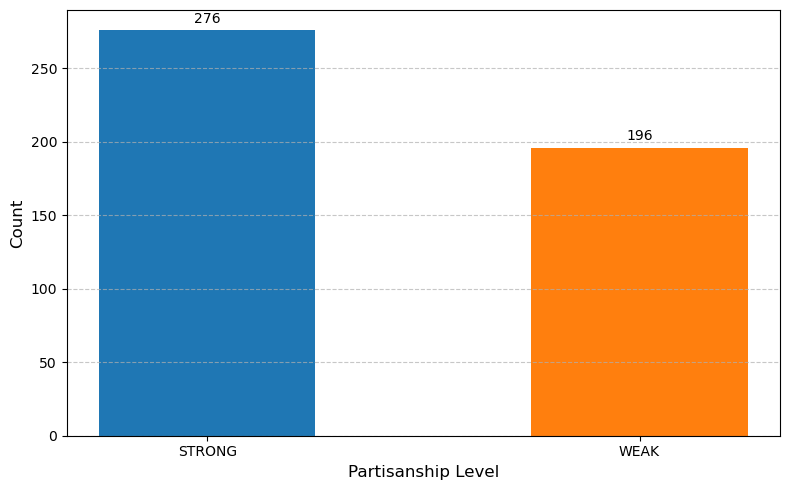

In [39]:
import matplotlib.pyplot as plt


categories = ['STRONG', 'WEAK']
counts = [276, 196]
colors = ['tab:blue', 'tab:orange']


plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color=colors, width=0.5)
# plt.title('Distribution of Partisanship', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Partisanship Level', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=10)
filename = "partisanship-distribuiton.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


In [41]:
filtered_df = df2[df2['COO'] == 1]

ps_level_distribution = filtered_df['PS_Level'].value_counts()

print(ps_level_distribution)

filtered_df = df2[df2['COO'] == 2]
ps_level_distribution = filtered_df['PS_Level'].value_counts()
print(ps_level_distribution)
filtered_df = df2[df2['COO'] == 3]
ps_level_distribution = filtered_df['PS_Level'].value_counts()
print(ps_level_distribution)

PS_Level
STRONG    113
WEAK       47
Name: count, dtype: int64
PS_Level
WEAK      97
STRONG    62
Name: count, dtype: int64
PS_Level
STRONG    101
WEAK       52
Name: count, dtype: int64


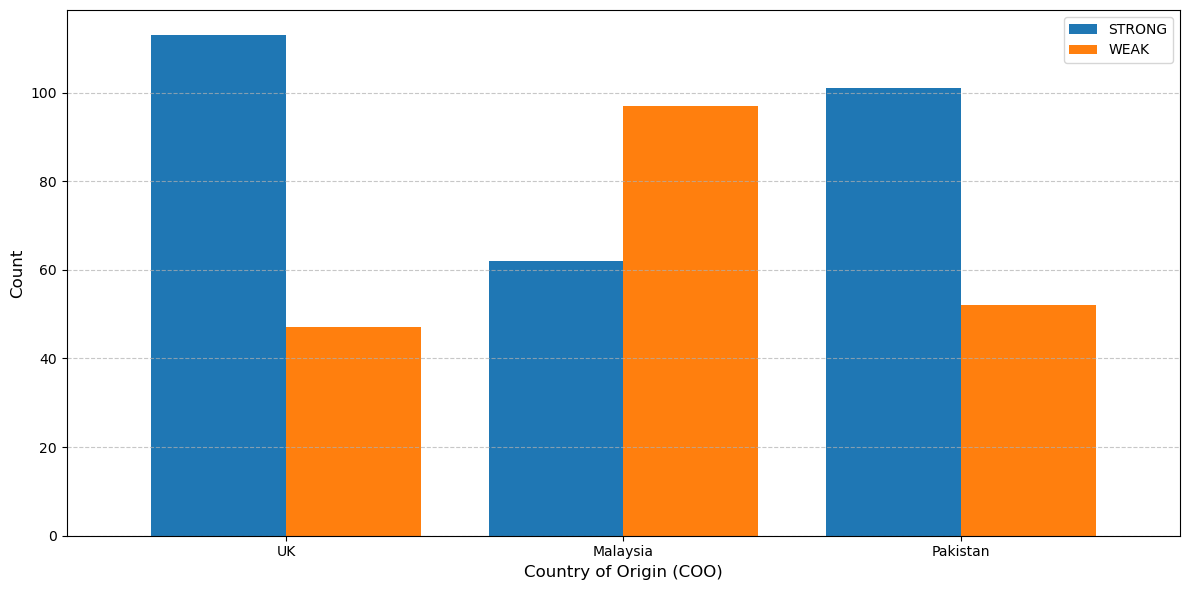

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

coo_ps_counts = df2.groupby(['COO', 'PS_Level']).size().unstack(fill_value=0)
custom_labels = ['UK', 'Malaysia', 'Pakistan']
ax = coo_ps_counts.plot(kind='bar', stacked=False, figsize=(12, 6), width=0.8)

# plt.title('Distribution of Partisanship Level by Country of Origin', fontsize=14)
plt.xlabel('Country of Origin (COO)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
filename = "partisanship-distribuiton-by-coo.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [45]:
for ed_value in range(1, 11):
    filtered_df = df2[df2['ED'] == ed_value]
    ps_level_distribution = filtered_df['PS_Level'].value_counts()
    
    print(f"Distribution for ED = {ed_value}:")
    print(ps_level_distribution)
    print("-" * 40)  # Separator for better readability

Distribution for ED = 1:
PS_Level
STRONG    138
WEAK      104
Name: count, dtype: int64
----------------------------------------
Distribution for ED = 2:
PS_Level
STRONG    14
WEAK       6
Name: count, dtype: int64
----------------------------------------
Distribution for ED = 3:
PS_Level
WEAK      24
STRONG    20
Name: count, dtype: int64
----------------------------------------
Distribution for ED = 4:
PS_Level
STRONG    2
WEAK      1
Name: count, dtype: int64
----------------------------------------
Distribution for ED = 5:
PS_Level
STRONG    71
WEAK      40
Name: count, dtype: int64
----------------------------------------
Distribution for ED = 6:
PS_Level
WEAK      14
STRONG     4
Name: count, dtype: int64
----------------------------------------
Distribution for ED = 7:
Series([], Name: count, dtype: int64)
----------------------------------------
Distribution for ED = 8:
PS_Level
STRONG    14
WEAK       4
Name: count, dtype: int64
----------------------------------------
Distrib

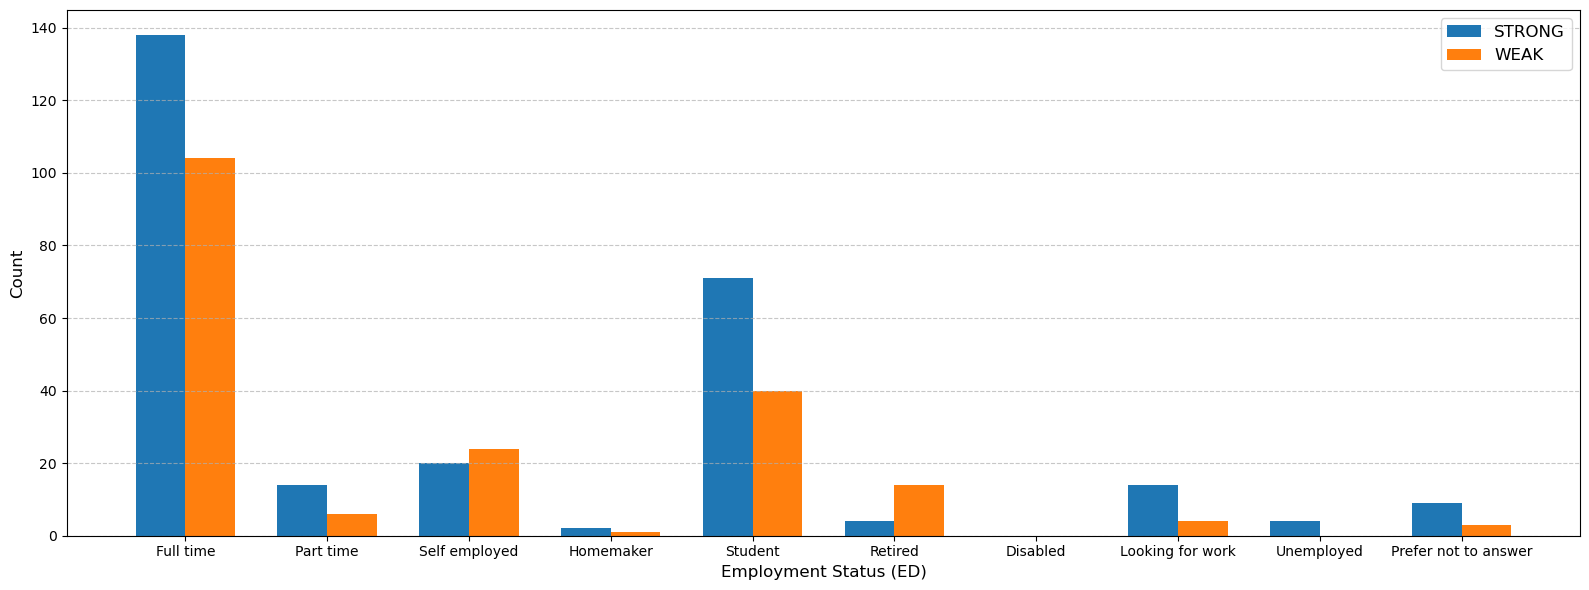

In [47]:
import matplotlib.pyplot as plt
import numpy as np

ed_values = range(1, 11)
strong_counts = []
weak_counts = []

for ed_value in ed_values:
    filtered_df = df2[df2['ED'] == ed_value]
    ps_level_distribution = filtered_df['PS_Level'].value_counts()
    
    strong_counts.append(ps_level_distribution.get('STRONG', 0))
    weak_counts.append(ps_level_distribution.get('WEAK', 0))


custom_labels = ['Full time', 'Part time', 'Self employed', 'Homemaker','Student', 'Retired', 
                 'Disabled', 'Looking for work', 'Unemployed','Prefer not to answer'
                ]

x = np.arange(len(ed_values))
bar_width = 0.35

plt.figure(figsize=(16, 6))
plt.bar(x - bar_width/2, strong_counts, bar_width, label='STRONG', color='tab:blue')
plt.bar(x + bar_width/2, weak_counts, bar_width, label='WEAK', color='tab:orange')


plt.xlabel('Employment Status (ED)', fontsize=12)
plt.ylabel('Count', fontsize=12)
# plt.title('Distribution of Partisanship Level by Employment Status', fontsize=14)
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

filename = "partisanship-distribuiton-by-employment-status.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()